# MADE BY CHIRAG LALA
### 20BCS4414@cuchd.in  (college email)
### chirag42001@gmail.com (personal email)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startup_funding.csv')

### Feature Details :
* SNo - Serial number.<br>
* Date - Date of funding in format DD/MM/YYYY.<br>
* StartupName - Name of the startup which got funded.<br>
* IndustryVertical - Industry to which the startup belongs.<br>
* SubVertical - Sub-category of the industry type.<br>
* CityLocation - City which the startup is based out of.<br>
* InvestorsName - Name of the investors involved in the funding round.<br>
* InvestmentType - Either Private Equity or Seed Funding.<br>
* AmountInUSD - Funding Amount in USD.<br>
* Remarks - Other information, if any.

### Doing some initial exploratory Data Analysis on the data before moving to specfic questions

In [3]:
df.shape

(2372, 10)

In [4]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [5]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

* We can see that many columns have empty data entries or null values, we will have to take care of all this when we do analysis for specfic problems 

### Problem Statement 1 
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [6]:
# Making a copy of dataframe so that changes made, will only effect the copy and no the original dataframe
df2 = df.copy()

In [7]:
df2.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


After reading the question we know that some records or tuples may contain more than one cities. and we need to analyze all the rows for some specfic indian cities. As not all teh rows contain more than one cities, we must first look at the data to find out how to get citiy data from cells having data of multiple cities

In [8]:
rows,columns = df2.shape

for i in range(rows):
    print(df2.iloc[i,5])

Bangalore
Mumbai
New Delhi
Mumbai
Hyderabad
Bangalore
Ahmedabad
Gurgaon
Bangalore
Noida
Mumbai
Bangalore
Gurgaon
Bangalore
Bangalore
Hyderabad
Pune
Mumbai
Bangalore
Bangalore
Hyderabad
Bangalore
Pune
Bangalore
Bangalore
Bangalore
Pune
Noida
Hyderabad
Kolkata
Bangalore
Bangalore
Bangalore
Bangalore
Gurgaon
Gurgaon
New Delhi
New Delhi
Bangalore
Bangalore
Bangalore
New Delhi
New Delhi
Bangalore
Gurgaon
Mumbai
Mumbai
bangalore
Bangalore
Bangalore
Mumbai
Mumbai
Gurgaon
Kolkata
Mumbai
Bangalore
New Delhi
New Delhi
Gurgaon
New Delhi
Mumbai
Hyderabad
Hyderabad
Bangalore
Bangalore
Mumbai
Hyderabad
Bangalore
Ahmedabad
Bangalore
New Delhi
Mumbai
Mumbai
New Delhi
Bangalore
Bangalore
Bangalore
Mumbai
Noida
Bangalore
Bangalore
Mumbai
Noida
Hyderabad
Gurgaon
New Delhi
Bangalore
Hyderabad
Bangalore
Mumbai
Mumbai
Bangalore
Hyderabad
Mumbai
Mumbai
Bangalore
Mumbai
Bangalore
Mumbai
Mumbai
Hyderabad
Bangalore
Noida
New Delhi
Bangalore
Pune
New Delhi
Mumbai
Bangalore
New Delhi
Mumbai
Bangalore
Gurgaon
Hyde

New Delhi
Pune
Pune
Noida
Gurgaon
Hyderabad
Bangalore
Mumbai
Bangalore/ Bangkok
Mumbai
Mumbai
Mumbai
Vadodara
Bangalore
Goa/Hyderabad
Gurgaon
Mumbai
Hyderabad
Bangalore
Gurgaon
Bangalore
Hyderabad
New Delhi
Mumbai
Bangalore
Bangalore
Gurgaon
Bangalore
Noida / Singapore
Bangalore
Bangalore
New Delhi
Bangalore
New Delhi
New Delhi
Noida
Gurgaon
Belgaum
Bangalore
New Delhi
Pune / US
Mumbai
Bangalore
Mumbai
Bangalore
New Delhi
Bangalore
Bangalore
Bangalore
Bangalore
Gurgaon
New Delhi
Mumbai
Chennai/ Singapore
Mumbai
New Delhi
New Delhi
Chennai
Mumbai
Gurgaon
Gurgaon
Bangalore
Bangalore
Mumbai
Noida
Chennai
New Delhi
Gurgaon
Gurgaon
Mumbai
New Delhi
Bangalore
New Delhi
Bangalore
Gurgaon
New Delhi
Gurgaon
Singapore
Hyderabad
New Delhi
Bangalore
Mumbai
Mumbai
Jaipur
New Delhi
New Delhi
Pune
Mumbai
Bangalore
Pune
Gurgaon
Mumbai
Mumbai
Mumbai
Gurgaon
Pune
New Delhi
Mumbai
New Delhi
Pune / Singapore
Bangalore
Mumbai
Hyderabad
New Delhi
Bangalore / San Mateo
Mumbai
Bangalore
New Delhi
New Delhi
Hy

In [9]:
rows,columns = df2.shape
count = 0
for i in range(rows):
    if df2.iloc[i,5] is np.nan:
        continue
    cities = len(df2.iloc[i,5].strip().split(' '))
    if cities==1 :
        continue
    print(df2.iloc[i,5])
    count += 1
print(" count is ",count)

New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi
New Delhi


Above we have split on balnk space, in the result we can see that there are cities that have been split by '/' as well as blank space. There might be chances that we have missed some cities split by just '/'. So lets check that


In [10]:
rows,columns = df2.shape
count = 0
for i in range(rows):
    if df2.iloc[i,5] is np.nan:
        continue
    if df2.iloc[i,5] == 'New Delhi':
        continue
#     cities = 0
    cities1 = len(df2.iloc[i,5].strip().split(' '))
    cities2 = len(df2.iloc[i,5].strip().split('/'))
    cities3 = len(df2.iloc[i,5].strip().split(','))
    if cities1==1 and cities2==1 and cities3==1 :
        continue
    print(df2.iloc[i,5])
    count += 1
print(" count is ",count)

Bangalore/ Bangkok
SFO / Bangalore
Seattle / Bangalore
Pune/Seattle
Pune / Dubai
Bangalore / SFO
New Delhi / US
Mumbai / UK
Hyderabad/USA
Bangalore / Palo Alto
Mumbai / NY
USA/India
Bangalore/ Bangkok
Goa/Hyderabad
Noida / Singapore
Pune / US
Chennai/ Singapore
Pune / Singapore
Bangalore / San Mateo
New York/ India
US/India
Gurgaon / SFO
Bangalore / USA
New Delhi/ Houston
New Delhi / US
Mumbai / Global
India / US
Pune / US
Pune / US
New Delhi / California
Dallas / Hyderabad
Bangalore / SFO
Pune / US
 count is  33


In the above we have actually done splitting using ',',' ','/' all three. But the count comes out to be the same even we do it using just ' ' and '/'. Moreover, by observation we can tell that ' ' only bring "New Delhi' into result in above block. Rest it is not used ot seperate any cities.So even that is not required

Below we are changing city names form banglore to "Banglore" and from "Delhi" to "New Delhi"

In [11]:
df2[df2['CityLocation']=='bangalore'] = 'Bangalore'
df2[df2['CityLocation']=='Delhi'] = 'New Delhi'


Below is a function which will work one by one on each entry of 'CityLocation' column. And it will return the required city names in the cell ( as per question), if there exists, other wise it will return what ever city name is present

In [12]:
required_cities = ["Bangalore","New Delhi","Mumbai","Gurgaon","Noida"]
def f(s):
    if s is np.nan:
        return s
    l = len(s.split('/'))
    if l==1:
        return s
    temp = s.split('/')
    for i in range(l):
        temp[i] = temp[i].strip()
    
    for j in required_cities:
        if j in temp:
            return j
    
    return temp[0]
    
    

In [13]:
single_city_column = df2['CityLocation'].apply(f) 

In [14]:
type(single_city_column)

pandas.core.series.Series

Getting Only those city entries, whose names are given in question 

In [15]:
bmncr_cities = single_city_column[(single_city_column=='Bangalore') | (single_city_column=='Mumbai') | (single_city_column=='Noida')
                                  | (single_city_column=='Gurgaon') | (single_city_column=='New Delhi')]

In [16]:
bmncr_counts = bmncr_cities.value_counts()

In [17]:
bmncr_counts

Bangalore    637
Mumbai       449
New Delhi    389
Gurgaon      241
Noida         79
Name: CityLocation, dtype: int64

Text(0, 0.5, 'number of times funded')

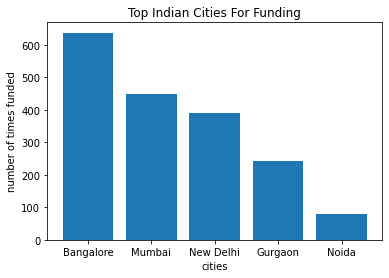

In [18]:
plt.bar(bmncr_counts.index,bmncr_counts.values)
plt.title("Top Indian Cities For Funding")
plt.xlabel("cities")
plt.ylabel("number of times funded")

### problem Statement 2 
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [19]:
df3 = df.copy()

In [20]:
df3.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Quering each entry in investor column one by one, and making a dictionary for each investor name and corresponding frequency of investment 

In [21]:
investment_count = dict()
for investors in df3['InvestorsName']:
    if investors is np.nan:
        continue
    for investor in investors.split(','):
        investor = investor.strip()
        investment_count[investor] = investment_count.get(investor,0) + 1

making a list of tuples.Each tuple is having investor name and number of times they invested

In [22]:
investments = []
for i,j in investment_count.items():
    investments.append((j,i))

Sorting in reverse the investments array.Reverse with respect to number of times they invested

In [23]:
investments.sort(reverse=True)

In [24]:
investments

[(64, 'Sequoia Capital'),
 (53, 'Accel Partners'),
 (44, 'Kalaari Capital'),
 (41, 'SAIF Partners'),
 (40, 'Indian Angel Network'),
 (39, 'Blume Ventures'),
 (38, ''),
 (33, 'Undisclosed Investors'),
 (30, 'Ratan Tata'),
 (28, 'Undisclosed investors'),
 (25, 'Tiger Global'),
 (25, 'Rajan Anandan'),
 (24, 'Nexus Venture Partners'),
 (22, 'Kae Capital'),
 (22, 'IDG Ventures'),
 (21, 'India Quotient'),
 (20, '500 Startups'),
 (18, 'Matrix Partners'),
 (18, 'Anupam Mittal'),
 (17, 'Mumbai Angels'),
 (17, 'LetsVenture'),
 (17, 'Kunal Shah'),
 (16, 'Unitus Seed Fund'),
 (16, 'Omidyar Network'),
 (15, 'Sequoia India'),
 (15, 'Norwest Venture Partners'),
 (15, 'IDG Ventures India'),
 (15, 'Group of Angel Investors'),
 (14, 'ah! Ventures'),
 (14, 'Tracxn Labs'),
 (14, 'Tiger Global Management'),
 (14, 'TV Mohandas Pai'),
 (14, 'Sandeep Tandon'),
 (14, 'Helion Venture Partners'),
 (14, 'Bessemer Venture Partners'),
 (13, 'Kunal Bahl'),
 (13, 'Jungle Ventures'),
 (13, 'Girish Mathrubootham'),
 (1

In [25]:
top_5_investors = investments[:5]

The top 5 investors are

In [26]:
top_5_investors

[(64, 'Sequoia Capital'),
 (53, 'Accel Partners'),
 (44, 'Kalaari Capital'),
 (41, 'SAIF Partners'),
 (40, 'Indian Angel Network')]

Next we will make a bar graph representing the number of times the top 5 investors invested

In [27]:
top_5_investors = np.array(top_5_investors)

In [28]:
counts = top_5_investors[:,0]
names = top_5_investors[:,1]

In [29]:
counts = list(counts)
names = list(names)

In [30]:
for i in range(len(counts)):
    counts[i] = int(counts[i])

In [31]:
counts,names

([64, 53, 44, 41, 40],
 ['Sequoia Capital',
  'Accel Partners',
  'Kalaari Capital',
  'SAIF Partners',
  'Indian Angel Network'])

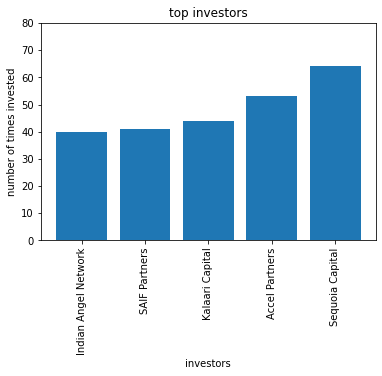

In [32]:
# plt.pie(counts,labels=names)
plt.bar(np.flip(names),np.flip(counts))
plt.ylim(0,80)
plt.xlabel("investors")
plt.ylabel("number of times invested")
plt.title("top investors")
plt.xticks(rotation=90)
plt.show()

### Problem Statement 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [33]:
df4 = df.copy()

In [34]:
df4.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


We will be needing only to deal with 'Startup Name' and 'Investor name" ans hence below we are descarding all other columns and keeping only those two columns 

In [35]:
df4 = df4.loc[:,["StartupName","InvestorsName"]]

In [36]:
df4

,StartupName,InvestorsName
0,TouchKin,Kae Capital
1,Ethinos,Triton Investment Advisors
2,Leverage Edu,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,..."
3,Zepo,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ..."
4,Click2Clinic,"Narottam Thudi, Shireesh Palle"
...,...,...
2367,Printvenue,Asia Pacific Internet Group
2368,Graphene,KARSEMVEN Fund
2369,Mad Street Den,"Exfinity Fund, GrowX Ventures."
2370,Simplotel,MakeMyTrip


We need to correct name of the following startups : Ola, Flipkart, Oyo and Paytm. 
So we should first find out that which are the wrong entries.
For finding that lest roint names of all statups in sorted manner

In [37]:
startups = df4["StartupName"].unique()

In [38]:
startups = np.sort(startups)

looking at all the similar names ot know that which names are to be corrected

In [39]:
for i in startups:
    if "flipkart" in i.lower() :
        print(i)
    if "ola" in i.lower():
        print(i)
    if "oyo" in i.lower():
        print(i)
    if "paytm" in i.lower():
        print(i)

Applied Solar Technologies
EzySolare
Flipkart
Flipkart.com
FroyoFit
HolaChef
Holachef
Kolabro
OYO Rooms
OYOfit
Ola
Ola Cabs
Olacabs
Oriano Solar
Oyo
Oyo Rooms
OyoRooms
Oyorooms
Paytm
Paytm Marketplace
SolarTown
Truckola


#### Following names are to be corrected
* Flipkart.com 
* Oyo Rooms 
* OyoRooms 
* Oyorooms
* OYO Rooms
* Ola Cabs
* Olacabs
* Paytm Marketplce

In [40]:
df4[df4['StartupName']=='Flipkart.com'] = 'Flipkart'
df4[df4['StartupName']=='OYO Rooms'] = 'Oyo'
df4[df4['StartupName']=='Oyo Rooms'] = 'Oyo'
df4[df4['StartupName']=='OyoRooms'] = 'Oyo'
df4[df4['StartupName']=='Oyorooms'] = 'Oyo'
df4[df4['StartupName']=='Olacabs'] = 'Ola'
df4[df4['StartupName']=='Ola Cabs'] = 'Ola'
df4[df4['StartupName']=='Paytm Marketplace'] = 'Paytm'





Below we create a dictionary to store the names of the startups that a investor invested in

In [41]:
investors = dict()

r = df4.shape[0]

for i in range(r):
    if df4.iloc[i,1] is np.nan :
        continue
    if df4.iloc[i,0] is np.nan :
        continue    
    names = df4.iloc[i,1].split(',')
#     print(names)
#     print(df.iloc[i,0],type(df.iloc[i,0]))
    company = df4.iloc[i,0].strip()
    
    for name in names:
        name = name.strip()
        if name in investors :
            investors[name].add(company)
        else:
            investors[name] = {company}
    

Now we create a list where we insert tuples , each tuple representing the name of the investor and numpber of companies the investor invested in

In [42]:
investor_frequency = []
for i in investors:
    investor_frequency.append((i,len(investors[i])))

In [43]:
investor_frequency

[('Kae Capital', 20),
 ('Triton Investment Advisors', 1),
 ('Kashyap Deorah', 3),
 ('Anand Sankeshwar', 2),
 ('Deepak Jain', 1),
 ('Sadashiva NT', 1),
 ('Arjun Mehta', 1),
 ('Satish Kaul', 1),
 ('Anindya Ghose', 1),
 ('Kunal Shah', 17),
 ('LetsVenture', 17),
 ('Anupam Mittal', 18),
 ('Hetal Sonpal', 1),
 ('Narottam Thudi', 1),
 ('Shireesh Palle', 1),
 ('Reliance Corporate Advisory Services Ltd', 1),
 ('Infuse Ventures', 8),
 ('JLL', 2),
 ('Asset Management (Asia) Ltd', 1),
 ('Digital Garage Inc', 1),
 ('Kalaari Capital', 41),
 ('Nexus India Capital Advisors', 1),
 ('International Finance Corporation', 2),
 ('Rocketship', 2),
 ('Accel Partners', 47),
 ('Jungle Ventures', 11),
 ('Shailesh Rao', 1),
 ('Venture Highway', 3),
 ('BCCL', 1),
 ('Blume Ventures', 36),
 ('Contrarian Capital India Partners', 1),
 ('Emergent Ventures India', 1),
 ('Pallav Nadhani', 4),
 ('Ashish Gupta', 5),
 ('Sharad Sharma', 4),
 ('Sirion Labs', 1),
 ('India Quotient', 18),
 ('Shunwei Capital', 3),
 ('Sreeram Iye

Now we will sort the list in descening order and take out the 5 investord who invested most number of time

In [44]:
investor_frequency.sort(key=lambda x:x[1],reverse=True)

In [45]:
investor_frequency[:5]

[('Sequoia Capital', 48),
 ('Accel Partners', 47),
 ('Kalaari Capital', 41),
 ('Indian Angel Network', 40),
 ('', 38)]

As we can see that the last investor is actually blank space, we need take the next investor

In [46]:
investor_frequency[:6]

[('Sequoia Capital', 48),
 ('Accel Partners', 47),
 ('Kalaari Capital', 41),
 ('Indian Angel Network', 40),
 ('', 38),
 ('Blume Ventures', 36)]

In [47]:
top_investors = investor_frequency[:4]+investor_frequency[5:6]

In [48]:
top_investors

[('Sequoia Capital', 48),
 ('Accel Partners', 47),
 ('Kalaari Capital', 41),
 ('Indian Angel Network', 40),
 ('Blume Ventures', 36)]

Now we will plot bar graph for he above obtained 

In [49]:
top_investors = np.array(top_investors)

In [50]:
top_investors


array([['Sequoia Capital', '48'],
       ['Accel Partners', '47'],
       ['Kalaari Capital', '41'],
       ['Indian Angel Network', '40'],
       ['Blume Ventures', '36']], dtype='<U20')

In [51]:
counts = [j for i,j in top_investors]

In [52]:
counts = [int(i) for i in counts]

In [53]:
counts

[48, 47, 41, 40, 36]

In [54]:
investors = top_investors[:,0]

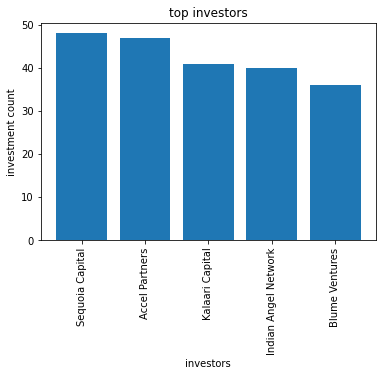

In [55]:
plt.bar(investors,counts)
plt.xticks(rotation=90)
plt.xlabel("investors")
plt.ylabel("investment count")
plt.title("top investors")
plt.show()

### problem Statement 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [56]:
df5 = df.copy()

In [57]:
df5.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [58]:
df5['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64

We need to correct the names of various types of funding, So for that we should first see the diffrent names that we have in the column

In [59]:
df5['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [60]:
df5[df5['InvestmentType']=='PrivateEquity'] = 'Private Equity'
df5[df5['InvestmentType']=='SeedFunding'] = 'Seed Funding'
df5[df5['InvestmentType']=='Crowd funding'] = 'Crowd Funding'


In [61]:
df5['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [62]:
df5['InvestmentType'].value_counts()

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64

for this problem we don not need the data of 'Private Equity' records and hence we have to remove them

In [63]:
df5 = df5[(df5['InvestmentType']=='Seed Funding') | (df5['InvestmentType']=='Crowd Funding')]

In [64]:
df5['InvestmentType'].value_counts()

Seed Funding     1301
Crowd Funding       2
Name: InvestmentType, dtype: int64

Now we can just take out the startup name and Investorname column
for here on the complete process will be very similar to pprevious problem

But first correcting the start up names

From here almost a similar process has been followed as was followed for the previous question 

In [65]:
df5[df5['StartupName']=='Flipkart.com'] = 'Flipkart'
df5[df5['StartupName']=='OYO Rooms'] = 'Oyo'
df5[df5['StartupName']=='Oyo Rooms'] = 'Oyo'
df5[df5['StartupName']=='OyoRooms'] = 'Oyo'
df5[df5['StartupName']=='Oyorooms'] = 'Oyo'
df5[df5['StartupName']=='Olacabs'] = 'Ola'
df5[df5['StartupName']=='Ola Cabs'] = 'Ola'
df5[df5['StartupName']=='Paytm Marketplace'] = 'Paytm'

In [66]:
df5 = df5.loc[:,['StartupName','InvestorsName']]

In [67]:
df5

,StartupName,InvestorsName
2,Leverage Edu,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,..."
3,Zepo,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ..."
4,Click2Clinic,"Narottam Thudi, Shireesh Palle"
5,Billion Loans,Reliance Corporate Advisory Services Ltd
11,Minjar,"Blume Ventures, Contrarian Capital India Partn..."
...,...,...
2356,Villgro,Michael & Susan Dell Foundation
2357,Corporate360,Group of Angel Investors
2358,Freshmonk,"August Capital Partners, Michael Blakey"
2362,Aasaanjobs,"Inventus Capital Partners, IDG Ventures"


In [68]:
investors = dict()

r = df5.shape[0]

for i in range(r):
    if df5.iloc[i,1] is np.nan :
        continue
    if df5.iloc[i,0] is np.nan :
        continue    
    names = df5.iloc[i,1].split(',')
#     print(names)
#     print(df.iloc[i,0],type(df.iloc[i,0]))
    company = df5.iloc[i,0].strip()
    
    for name in names:
        name = name.strip()
        if name in investors :
            investors[name].add(company)
        else:
            investors[name] = {company}
    

In [69]:
investor_frequency = []
for i in investors:
    investor_frequency.append((i,len(investors[i])))

In [70]:
investor_frequency.sort(key=lambda x:x[1],reverse=True)

In [71]:
top_investors = investor_frequency[:4]+investor_frequency[5:6]

In [72]:
top_investors

[('Indian Angel Network', 33),
 ('Undisclosed Investors', 27),
 ('Undisclosed investors', 24),
 ('Rajan Anandan', 23),
 ('LetsVenture', 16)]

In [73]:
investor_frequency

[('Indian Angel Network', 33),
 ('Undisclosed Investors', 27),
 ('Undisclosed investors', 24),
 ('Rajan Anandan', 23),
 ('', 22),
 ('LetsVenture', 16),
 ('Anupam Mittal', 16),
 ('Kunal Shah', 14),
 ('ah! Ventures', 12),
 ('500 Startups', 11),
 ('Kae Capital', 11),
 ('undisclosed investors', 11),
 ('Anand Chandrasekaran', 11),
 ('Singapore Angel Network', 11),
 ('Aprameya Radhakrishna', 11),
 ('Tracxn Labs', 11),
 ('Kunal Bahl', 11),
 ('Blume Ventures', 10),
 ('Girish Mathrubootham', 10),
 ('The Chennai Angels', 10),
 ('Sandeep Tandon', 10),
 ('Rohit Bansal', 10),
 ('TV Mohandas Pai', 9),
 ('YouWeCan Ventures', 9),
 ('Ratan Tata', 9),
 ('Undisclosed Investor', 9),
 ('Undisclosed investor', 9),
 ('India Quotient', 8),
 ('Mumbai Angels', 8),
 ('Undisclosed', 8),
 ('Amit Gupta', 8),
 ('Hyderabad Angels', 7),
 ('Vijay Shekhar Sharma', 7),
 ('Binny Bansal', 7),
 ('Zishaan Hayath', 7),
 ('Unitus Seed Fund', 7),
 ('Group of Angel Investors', 7),
 ('Amit Ranjan', 6),
 ('Accel Partners', 6),
 ('

In [74]:
top_investors = investor_frequency[:1]+investor_frequency[3:4]+investor_frequency[5:8]

In [75]:
top_investors

[('Indian Angel Network', 33),
 ('Rajan Anandan', 23),
 ('LetsVenture', 16),
 ('Anupam Mittal', 16),
 ('Kunal Shah', 14)]

In [76]:
top_investors = np.array(top_investors) 
counts = top_investors[:,1]
companies = top_investors[:,0]

In [77]:
counts,companies


(array(['33', '23', '16', '16', '14'], dtype='<U20'),
 array(['Indian Angel Network', 'Rajan Anandan', 'LetsVenture',
        'Anupam Mittal', 'Kunal Shah'], dtype='<U20'))

In [78]:
counts = list(counts)

In [79]:
companies = list(companies)

In [80]:
counts = [int(i) for i in counts]


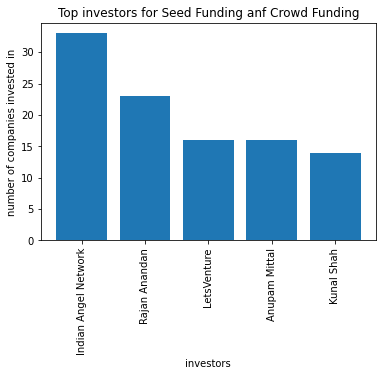

In [81]:
plt.bar(companies,counts)
plt.xticks(rotation = 90)
plt.xlabel("investors")
plt.ylabel('number of companies invested in')
plt.title("Top investors for Seed Funding anf Crowd Funding")
plt.show()


### Problem Statement 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [82]:
df6 = df.copy()

This is very similar to previous problem. The only difference is that, in this we need to consider The funding type as Private Equity

But that is really the only difference

Before that we will need to correct the spelling mistakes in both funding type and startup names

In [83]:
df6[df6['InvestmentType']=='PrivateEquity'] = 'Private Equity'
df6[df6['InvestmentType']=='SeedFunding'] = 'Seed Funding'
df6[df6['InvestmentType']=='Crowd funding'] = 'Crowd Funding'

df6[df6['StartupName']=='Flipkart.com'] = 'Flipkart'
df6[df6['StartupName']=='OYO Rooms'] = 'Oyo'
df6[df6['StartupName']=='Oyo Rooms'] = 'Oyo'
df6[df6['StartupName']=='OyoRooms'] = 'Oyo'
df6[df6['StartupName']=='Oyorooms'] = 'Oyo'
df6[df6['StartupName']=='Olacabs'] = 'Ola'
df6[df6['StartupName']=='Ola Cabs'] = 'Ola'
df6[df6['StartupName']=='Paytm Marketplace'] = 'Paytm'



In [84]:
df6

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [85]:
df6 = df6[df6['InvestmentType']=='Private Equity']

In [86]:
df6['InvestmentType'].value_counts()

Private Equity    1055
Name: InvestmentType, dtype: int64

In [87]:
df6 = df6.loc[:,['StartupName','InvestorsName']]

In [88]:
df6

,StartupName,InvestorsName
0,TouchKin,Kae Capital
1,Ethinos,Triton Investment Advisors
6,Ecolibriumenergy,"Infuse Ventures, JLL"
7,Droom,"Asset Management (Asia) Ltd, Digital Garage Inc"
8,Jumbotail,"Kalaari Capital, Nexus India Capital Advisors"
...,...,...
2366,Grabhouse.com,"Kalaari Capital, Sequoia Capital"
2367,Printvenue,Asia Pacific Internet Group
2368,Graphene,KARSEMVEN Fund
2369,Mad Street Den,"Exfinity Fund, GrowX Ventures."


In [89]:
investors = dict()

r = df6.shape[0]

for i in range(r):
    if df6.iloc[i,1] is np.nan :
        continue
    if df6.iloc[i,0] is np.nan :
        continue    
    names = df6.iloc[i,1].split(',')
#     print(names)
#     print(df.iloc[i,0],type(df.iloc[i,0]))
    company = df6.iloc[i,0].strip()
    
    for name in names:
        name = name.strip()
        if name in investors :
            investors[name].add(company)
        else:
            investors[name] = {company}
    

In [90]:
investor_frequency = []
for i in investors:
    investor_frequency.append((i,len(investors[i])))

investor_frequency.sort(key=lambda x:x[1],reverse=True)

In [91]:
investor_frequency

[('Sequoia Capital', 45),
 ('Accel Partners', 43),
 ('Kalaari Capital', 35),
 ('Blume Ventures', 26),
 ('SAIF Partners', 24),
 ('Tiger Global', 22),
 ('Nexus Venture Partners', 20),
 ('Ratan Tata', 20),
 ('IDG Ventures', 17),
 ('', 16),
 ('Omidyar Network', 15),
 ('Sequoia India', 14),
 ('Matrix Partners', 14),
 ('Tiger Global Management', 14),
 ('Helion Venture Partners', 13),
 ('Norwest Venture Partners', 12),
 ('IDG Ventures India', 12),
 ('Bessemer Venture Partners', 11),
 ('Kae Capital', 10),
 ('India Quotient', 10),
 ('Brand Capital', 10),
 ('500 Startups', 9),
 ('Lightspeed Venture Partners', 9),
 ('Trifecta Capital', 9),
 ('Unitus Seed Fund', 9),
 ('RoundGlass Partners', 9),
 ('IvyCap Ventures', 8),
 ('Nandan Nilekani', 8),
 ('Times Internet', 8),
 ('Orios Venture Partners', 8),
 ('Qualcomm Ventures', 8),
 ('Flipkart', 8),
 ('YourNest Angel Fund', 8),
 ('Mumbai Angels', 8),
 ('Jungle Ventures', 7),
 ('Indian Angel Network', 7),
 ('Eight Roads Ventures', 7),
 ('Matrix Partners I

In [92]:
top_investors = investor_frequency[:5]

In [93]:
top_investors

[('Sequoia Capital', 45),
 ('Accel Partners', 43),
 ('Kalaari Capital', 35),
 ('Blume Ventures', 26),
 ('SAIF Partners', 24)]

In [94]:
top_investors = np.array(top_investors)

In [95]:
top_investors

array([['Sequoia Capital', '45'],
       ['Accel Partners', '43'],
       ['Kalaari Capital', '35'],
       ['Blume Ventures', '26'],
       ['SAIF Partners', '24']], dtype='<U15')

In [96]:
counts = list(top_investors[:,1])

In [97]:
names = list(top_investors[:,0])

In [98]:
counts,names

(['45', '43', '35', '26', '24'],
 ['Sequoia Capital',
  'Accel Partners',
  'Kalaari Capital',
  'Blume Ventures',
  'SAIF Partners'])

In [99]:
type(counts[0])

numpy.str_

In [100]:
type(counts)

list

In [101]:
counts = [int(i) for i in counts]

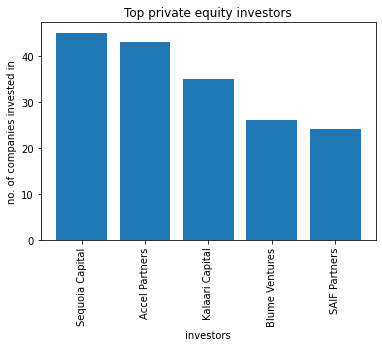

In [102]:
plt.bar(names,counts)
plt.xlabel("investors")
plt.ylabel("no. of companies invested in")
plt.title("Top private equity investors")
plt.xticks(rotation=90)
plt.show()